In [ ]:
# 1) Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
#Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [340]:
names = 'Name1 Surname1, Name2 Surname2, Name3 Surname 3'

In [341]:
print ('1\n2')

1
2


In [342]:
names.split(', ') 

['Name1 Surname1', 'Name2 Surname2', 'Name3 Surname 3']

In [343]:
2) В переменной df содержатся данные как на картинке task2.png (находится в папке с заданием)
#Отберите из них только те, где wealth 'medium', а возраст больше 35, и поместите в переменную medium_35

SyntaxError: unmatched ')' (<ipython-input-343-00f712e90f47>, line 1)

In [1]:
import pandas as pd


In [2]:
df = pd.DataFrame ({
    'client_id' : [65,105,208,666,223],
    'sex' : [1,0,1,1,0],
    'wealth' : ['medium','high','high','low','medium'],
    'age': [40,20,27,85,68]  
})

In [3]:
medium_35=df.query("wealth=='medium' and age>35")

In [347]:
3) Ваш коллега-новичок перепутал названия колонок в таблице из предыдущих заданий и
#прислал вам такой вариант task3.png (находится в папке с заданием)
#Приведите таблицу к каноничному виду, сохранив её в ту же переменную df, 
#где сейчас находится нестандартно наименнованная таблица (воспользуйтесь методом rename)
#Note: колонка называется Клиент id - шрифт плохо передаёт кейс i в id


SyntaxError: unmatched ')' (<ipython-input-347-4f5dbba29557>, line 1)

In [4]:
df.columns = ['Клиент Id','Пол', 'Благосостояние', 'Возраст']

In [5]:
df=df.rename (columns={'Клиент Id':'client_id' ,
                    'Пол':'sex',
                    'Благосостояние':'wealth',
                    'Возраст': 'age'
    
}) 


In [6]:
#4)Добавьте в исследуемый нами датафрэйм df колонку older_than_30, 
#в которой будет храниться больше ли возраст 30 лет (булиновское значение)


In [7]:
df

,client_id,sex,wealth,age
0,65,1,medium,40
1,105,0,high,20
2,208,1,high,27
3,666,1,low,85
4,223,0,medium,68


In [8]:
df['older_than_30'] = df.age>35

In [9]:
df

,client_id,sex,wealth,age,older_than_30
0,65,1,medium,40,True
1,105,0,high,20,False
2,208,1,high,27,False
3,666,1,low,85,True
4,223,0,medium,68,True


In [10]:
#5) А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num

In [11]:
unique_num = df.agg({'client_id':pd.Series.nunique, 'sex':pd.Series.nunique,
                     'wealth':pd.Series.nunique,'age':pd.Series.nunique,'older_than_30':pd.Series.nunique}) 

In [12]:
unique_num = df.nunique()

In [13]:
unique_num

client_id        5
sex              2
wealth           3
age              5
older_than_30    2
dtype: int64

In [14]:
#6) У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида: task6.png
#Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать переменные иногда бывает сложно)


In [15]:
data = pd.DataFrame ({
    'client_id':[65,7811,1549,666,2365],
    'amount':[42321,88420,1714,8619,65730],
    'date':[84651234,789465132,7984651,8465132,89465132]
})

In [19]:
full_data = df.merge(data,how='inner',on='client_id')
full_data

,client_id,sex,wealth,age,older_than_30,amount,date
0,65,1,medium,40,True,42321,84651234
1,666,1,low,85,True,8619,8465132


In [18]:
full_data = df.merge(data, on='client_id')
full_data

,client_id,sex,wealth,age,older_than_30,amount,date
0,65,1,medium,40,True,42321,84651234
1,666,1,low,85,True,8619,8465132


In [364]:
full_data = df.merge(data,how='left')
full_data

,client_id,sex,wealth,age,older_than_30,amount,date
0,65,1,medium,40,True,42321.0,84651234.0
1,105,0,high,20,False,NaN,NaN
2,208,1,high,27,False,NaN,NaN
3,666,1,low,85,True,8619.0,8465132.0
4,223,0,medium,68,True,NaN,NaN


In [23]:
df

,client_id,sex,wealth,age,older_than_30
0,65,1,medium,40,True
1,105,0,high,20,False
2,208,1,high,27,False
3,666,1,low,85,True
4,223,0,medium,68,True


In [24]:
data

,client_id,amount,date
0,65,42321,84651234
1,7811,88420,789465132
2,1549,1714,7984651
3,666,8619,8465132
4,2365,65730,89465132


In [ ]:
#7)💀 Сложное задание! 💀
А теперь создадим свою собственную функцию!
Напишите функцию read_n_agg, которая 
- принимает на вход один параметр – путь к файлу
- считывает переданный файл, в котором разделителем является ;
- считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
- возвращает результат этих действий (агрегированный датафрэйм)
Данные выглядят как в task7.png, датасэт в файле companies.csv

In [149]:
df = pd.read_csv('companies.csv', sep=';')

In [151]:
df.groupby('company') \
    .agg({'income':'mean'})

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


In [153]:
 def read_n_agg (path):
    df = pd.read_csv('companies.csv', sep=';')
    res= df.groupby('company') \
    .agg({'income':'mean'})
    return res

In [155]:
read_n_agg ('companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


In [ ]:
#8 Импортируйте pandas как pd. Загрузите датасет, используя ; в качестве разделителя. 
Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). 
#Результат запишите в taxi.
Может пригодиться: read_csv()
Датасет для задания: taxi_peru.csv (в папке).

In [289]:
import pandas as pd

In [290]:
taxi = pd.read_csv('taxi_peru.csv', sep= ';', parse_dates=[ 'start_at', 'end_at', 'arrived_at'
])

In [291]:
taxi.dtypes.value_counts()

object            14
datetime64[ns]     3
float64            2
dtype: int64

In [292]:
#9) Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.source
ЧАСТОТА - ДЕЛИМ НА ОБЩЕЕ КОЛВО СТРОК

SyntaxError: invalid syntax (<ipython-input-292-830094d68991>, line 2)

In [293]:
taxi.source.value_counts() / taxi.shape[0] 

iPhone     0.421488
web        0.330189
Android    0.212410
iPad       0.024707
Wap        0.005885
Name: source, dtype: float64

In [294]:
taxi.source.value_counts(normalize = True) *100

iPhone     42.374282
web        33.195580
Android    21.354620
iPad        2.483905
Wap         0.591613
Name: source, dtype: float64

In [295]:
taxi.source.value_counts(normalize = True).mul(100).round ()

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

In [ ]:
# 10) Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
- Посчитайте частоту встречаемости каждой из оценок #ЧАСТОТА - ДЕЛИМ НА ОБЩЕЕ КОЛВО СТРОК
- Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
- Сбросьте индексы
- Переименуйте колонки в driver_score и percentage
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
- Запишите результат в driver_score_counts
Полезные функции:
.mul() – умножение, более удобный вариант для использования в цепочке методов 
.round() – округление
.reset_index() – сбросить индекс
.value_counts() – сколько раз встречается каждое значение переменной


In [323]:
driver_score_counts = taxi.driver_score.value_counts (normalize=True).mul(100).round(2).reset_index()


In [324]:
driver_score_counts.rename (columns={'index':'driver_score', 'driver_score':'percentage'},inplace=True)
driver_score_counts = driver_score_counts.sort_values('driver_score',ascending=True) 

In [325]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [299]:
#11) Теперь строим график! (task11.png) Сначала импортируем библиотеки:
import seaborn as sns
import matplotlib.pyplot as plt
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:
ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

SyntaxError: invalid syntax (<ipython-input-299-92e4a2e28664>, line 4)

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

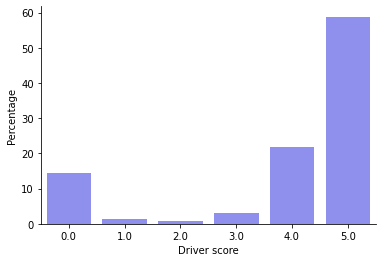

In [312]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine() 
plt.show()


In [ ]:
#12) 💀 Сложное задание! 💀 А ЧЕ СЛОЖНОГО
Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), 
не забыв построить график. В чем его отличие от распределения оценок водителей?


In [317]:
rider_score_counts = taxi.rider_score.value_counts(normalize=True).mul(100).round(2).reset_index()

In [318]:
rider_score_counts

,index,rider_score
0,5.0,87.10
1,4.0,8.83
2,0.0,2.29
3,3.0,1.38
4,1.0,0.21
5,2.0,0.19


In [319]:
rider_score_counts.rename (columns={'index':'rider_score', 'rider_score':'percentage'},inplace=True)
rider_score_counts = rider_score_counts.sort_values('rider_score',ascending=True) [:6]

In [320]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


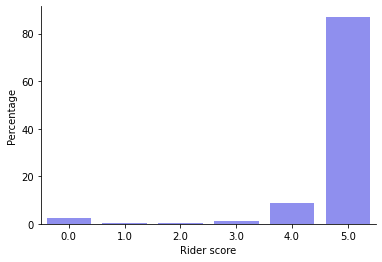

In [321]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine() 
plt.show()